In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
train = pd.read_csv('D:/_data_science/titanic/train.csv')
test = pd.read_csv('D:/_data_science/titanic/test.csv')

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
# setting passenger ID as index for both data sets
train.set_index(['PassengerId'],inplace=True)
test.set_index(['PassengerId'],inplace=True)

In [5]:
train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
test.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [7]:
train.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [8]:
test.isnull().sum()

Pclass        0
Name          0
Sex           0
Age          86
SibSp         0
Parch         0
Ticket        0
Fare          1
Cabin       327
Embarked      0
dtype: int64

In [9]:
train.dtypes

Survived      int64
Pclass        int64
Name         object
Sex          object
Age         float64
SibSp         int64
Parch         int64
Ticket       object
Fare        float64
Cabin        object
Embarked     object
dtype: object

In [10]:
test.dtypes

Pclass        int64
Name         object
Sex          object
Age         float64
SibSp         int64
Parch         int64
Ticket       object
Fare        float64
Cabin        object
Embarked     object
dtype: object

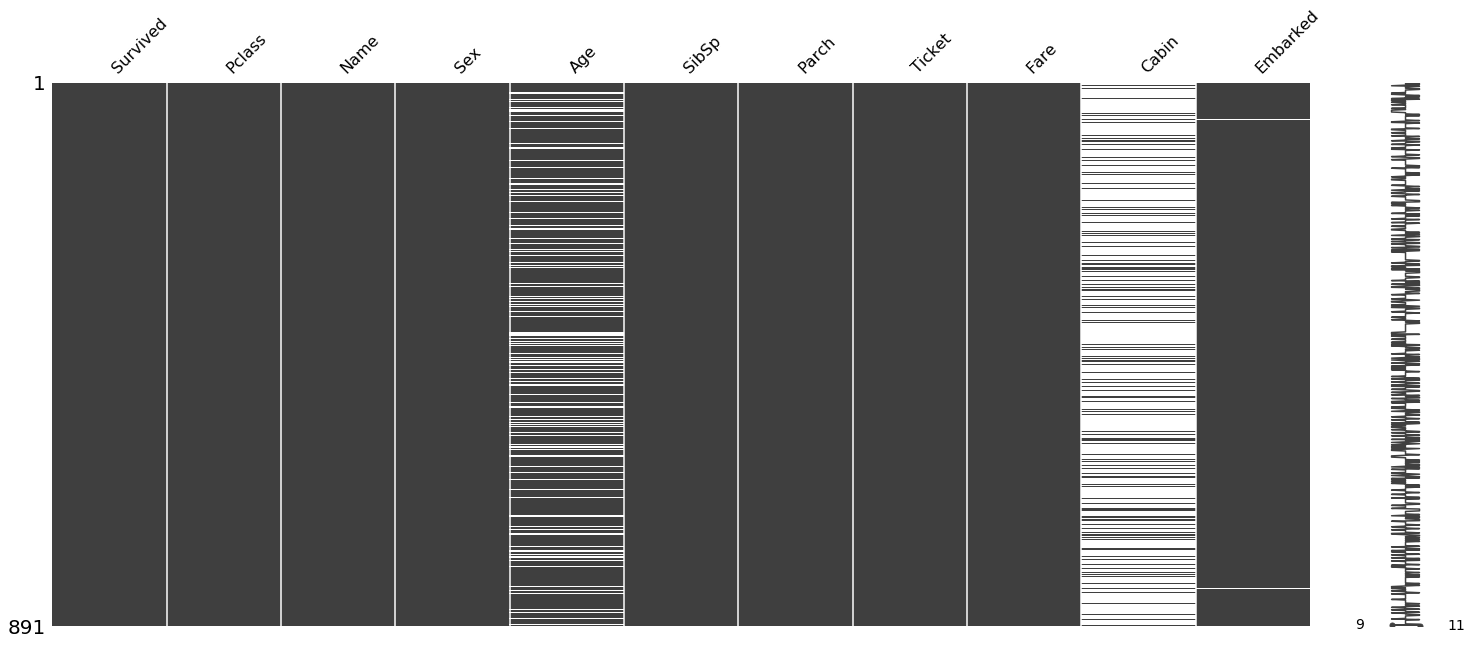

In [11]:
# visualization of nan values
import missingno as msno
msno.matrix(train)

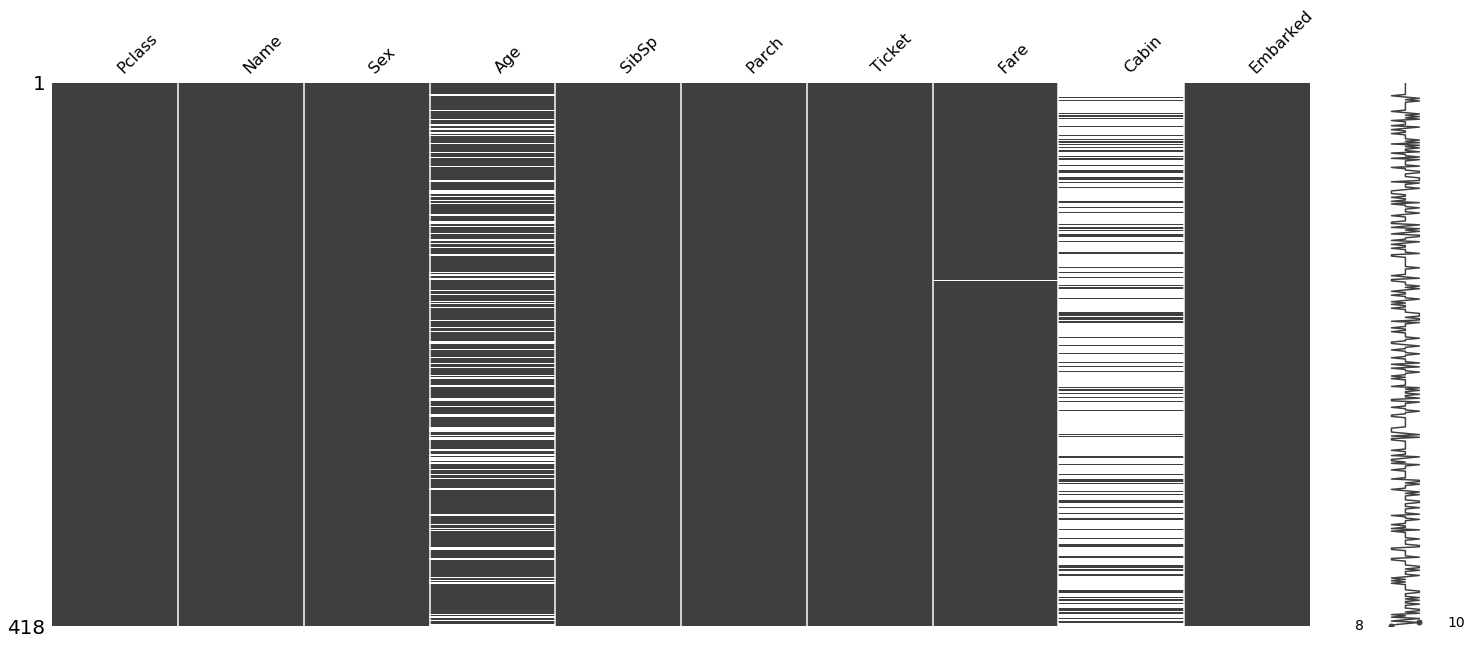

In [12]:
msno.matrix(test)

In [13]:
# Adding New column to both Data Sets using the Same old values
# Using Imputer to fill NaN values
from sklearn.preprocessing import Imputer
imp = Imputer(missing_values='NaN', strategy='median', axis=1)
AgeTrain = imp.fit_transform(train['Age'].values.reshape(1,-1))
AgeTrain = AgeTrain.T
train['AgeTrain'] = AgeTrain

AgeTest = imp.fit_transform(test['Age'].values.reshape(1,-1))
AgeTest = AgeTest.T
test['AgeTest'] = AgeTest

C:\Users\Kaustubh\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


In [14]:
train.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [15]:
# filing NaN with S as it is most occuring
train.Embarked.fillna('S', inplace=True)

In [16]:
# filling the one NaN Fare value
test.Fare.fillna(test.Fare.mean(), inplace=True)

In [17]:
# droping Age and Cabin
train.drop(['Age','Cabin'], axis=1, inplace=True)
test.drop(['Age','Cabin'], axis=1, inplace=True)

In [18]:
test.isnull().sum()

Pclass      0
Name        0
Sex         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Embarked    0
AgeTest     0
dtype: int64

In [19]:
train.isnull().sum()

Survived    0
Pclass      0
Name        0
Sex         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Embarked    0
AgeTrain    0
dtype: int64

In [20]:
# Replacing Male with 1 and Female with 0
train['Sex'] = train.Sex.apply(lambda x:0 if x == 'female' else 1)
test['Sex'] = test.Sex.apply(lambda x:0 if x == 'female' else 1)

In [21]:
train.Sex

PassengerId
1      1
2      0
3      0
4      0
5      1
      ..
887    1
888    0
889    0
890    1
891    1
Name: Sex, Length: 891, dtype: int64

In [22]:
test.Sex

PassengerId
892     1
893     0
894     1
895     1
896     0
       ..
1305    1
1306    0
1307    1
1308    1
1309    1
Name: Sex, Length: 418, dtype: int64

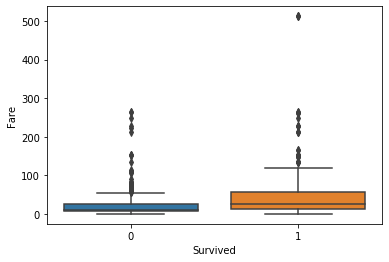

In [23]:
sns.boxplot(x='Survived', y='Fare', data=train)

In [24]:
train.groupby('Survived').mean()

,Pclass,Sex,SibSp,Parch,Fare,AgeTrain
Survived,,,,,,
0,2.531876,0.852459,0.553734,0.329690,22.117887,30.028233
1,1.950292,0.318713,0.473684,0.464912,48.395408,28.291433


In [25]:
train.groupby('Sex').mean()

,Survived,Pclass,SibSp,Parch,Fare,AgeTrain
Sex,,,,,,
0,0.742038,2.159236,0.694268,0.649682,44.479818,27.929936
1,0.188908,2.389948,0.429809,0.235702,25.523893,30.140676


In [26]:
train.corr()

,Survived,Pclass,Sex,SibSp,Parch,Fare,AgeTrain
Survived,1.000000,-0.338481,-0.543351,-0.035322,0.081629,0.257307,-0.064910
Pclass,-0.338481,1.000000,0.131900,0.083081,0.018443,-0.549500,-0.339898
Sex,-0.543351,0.131900,1.000000,-0.114631,-0.245489,-0.182333,0.081163
SibSp,-0.035322,0.083081,-0.114631,1.000000,0.414838,0.159651,-0.233296
Parch,0.081629,0.018443,-0.245489,0.414838,1.000000,0.216225,-0.172482
Fare,0.257307,-0.549500,-0.182333,0.159651,0.216225,1.000000,0.096688
AgeTrain,-0.064910,-0.339898,0.081163,-0.233296,-0.172482,0.096688,1.000000


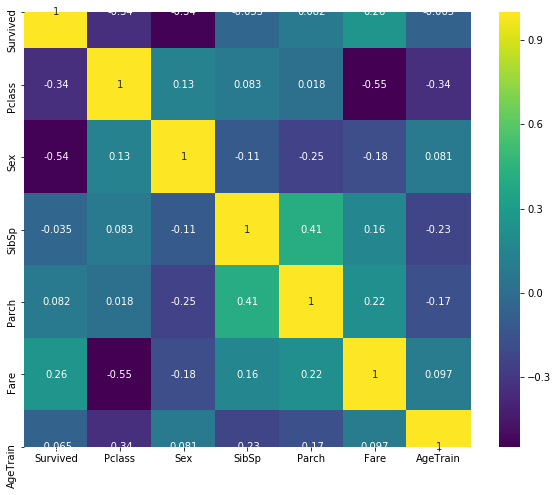

In [27]:
plt.subplots(figsize=(10,8))
sns.heatmap(train.corr(), annot=True, cmap='viridis')

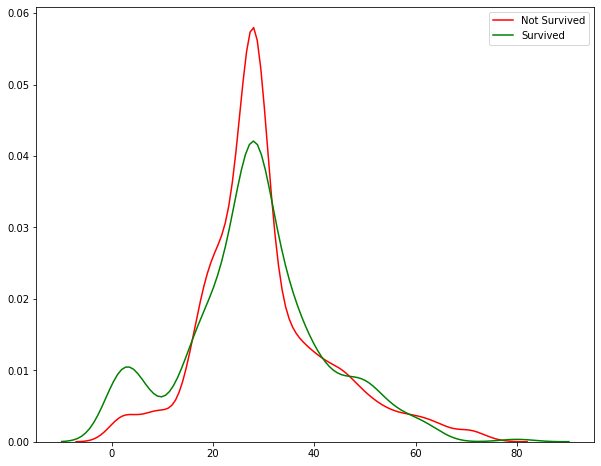

In [28]:
plt.subplots(figsize=(10,8))
sns.kdeplot(train.loc[(train['Survived']==0), 'AgeTrain'],color='r', Label='Not Survived')
sns.kdeplot(train.loc[(train['Survived']==1), 'AgeTrain'],color='g', Label='Survived')

In [29]:
# calculating Family members for each passenger

train['Family'] = train['Parch'] + train['SibSp'] + 1
train.head()

,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Embarked,AgeTrain,Family
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",1,1,0,A/5 21171,7.2500,S,22.0,2
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,1,0,PC 17599,71.2833,C,38.0,2
3,1,3,"Heikkinen, Miss. Laina",0,0,0,STON/O2. 3101282,7.9250,S,26.0,1
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,1,0,113803,53.1000,S,35.0,2
5,0,3,"Allen, Mr. William Henry",1,0,0,373450,8.0500,S,35.0,1


In [30]:
train.Family.value_counts()

1     537
2     161
3     102
4      29
6      22
5      15
7      12
11      7
8       6
Name: Family, dtype: int64

In [31]:
# creating new column

def family_size(size):
    a=''
    if (size<=1):
        a='Alone'
    elif(size<=4):
        a='Small'
    else:
        a='Large'
    return a
train['FamilySize'] = train['Family'].map(family_size)
train.head()

,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Embarked,AgeTrain,Family,FamilySize
PassengerId,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",1,1,0,A/5 21171,7.2500,S,22.0,2,Small
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,1,0,PC 17599,71.2833,C,38.0,2,Small
3,1,3,"Heikkinen, Miss. Laina",0,0,0,STON/O2. 3101282,7.9250,S,26.0,1,Alone
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,1,0,113803,53.1000,S,35.0,2,Small
5,0,3,"Allen, Mr. William Henry",1,0,0,373450,8.0500,S,35.0,1,Alone


In [32]:
# Creating New Column

def age_group(age):
    a=''
    if (age<=1):
        a='Infant'
    elif (age<=3):
        a='Toddler'
    elif (age<=13):
        a='Child'
    elif (age<=19):
        a='Teen'
    elif (age<=25):
        a='Young Adult'
    elif (age<=35):
        a='Adult'
    elif (age<=60):
        a='Middle Age'
    else:
        a='Old'
    return a
train['AgeGroup'] = train['AgeTrain'].map(age_group)
train.AgeGroup.value_counts()

Adult          373
Middle Age     195
Young Adult    137
Teen            93
Child           41
Old             22
Toddler         16
Infant          14
Name: AgeGroup, dtype: int64

In [33]:
# Creating New Column Fare Per Person

train['FarePP'] = train['Fare']/train['Family']
train.head()

,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Embarked,AgeTrain,Family,FamilySize,AgeGroup,FarePP
PassengerId,,,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",1,1,0,A/5 21171,7.2500,S,22.0,2,Small,Young Adult,3.62500
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,1,0,PC 17599,71.2833,C,38.0,2,Small,Middle Age,35.64165
3,1,3,"Heikkinen, Miss. Laina",0,0,0,STON/O2. 3101282,7.9250,S,26.0,1,Alone,Adult,7.92500
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,1,0,113803,53.1000,S,35.0,2,Small,Adult,26.55000
5,0,3,"Allen, Mr. William Henry",1,0,0,373450,8.0500,S,35.0,1,Alone,Adult,8.05000


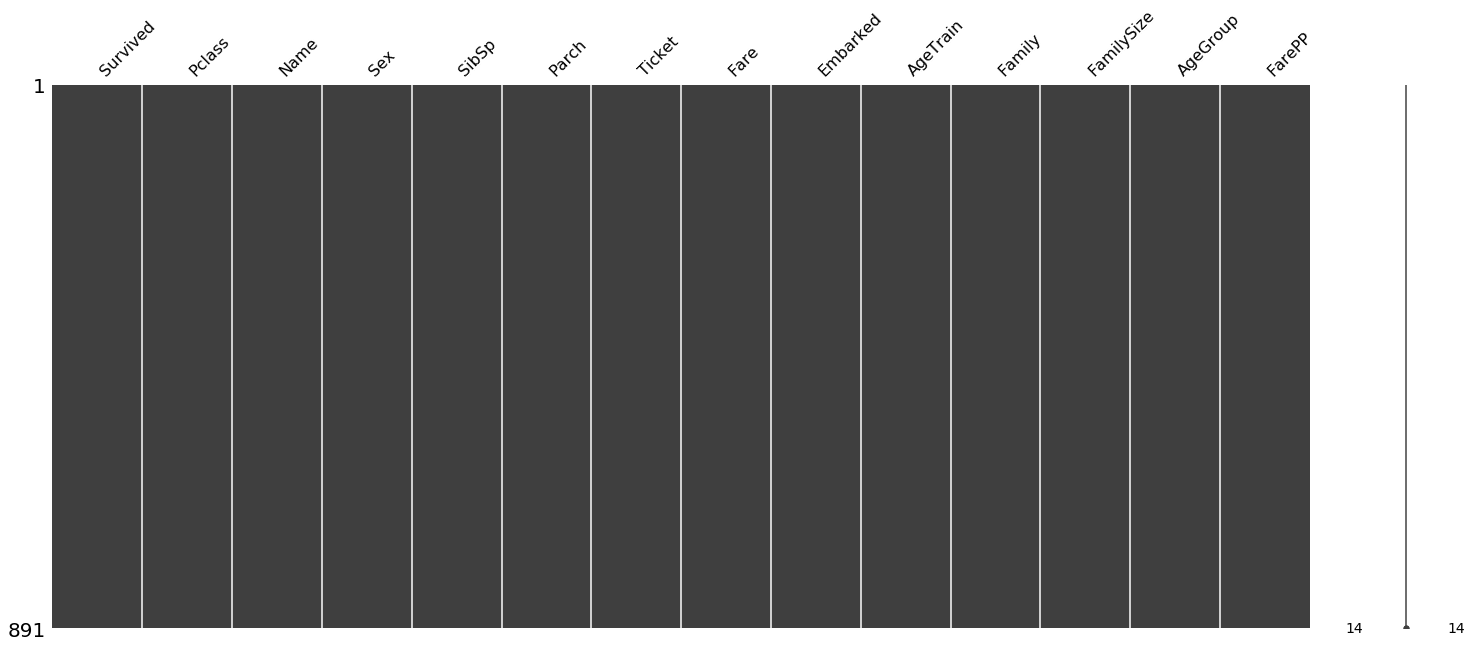

In [34]:
msno.matrix(train)

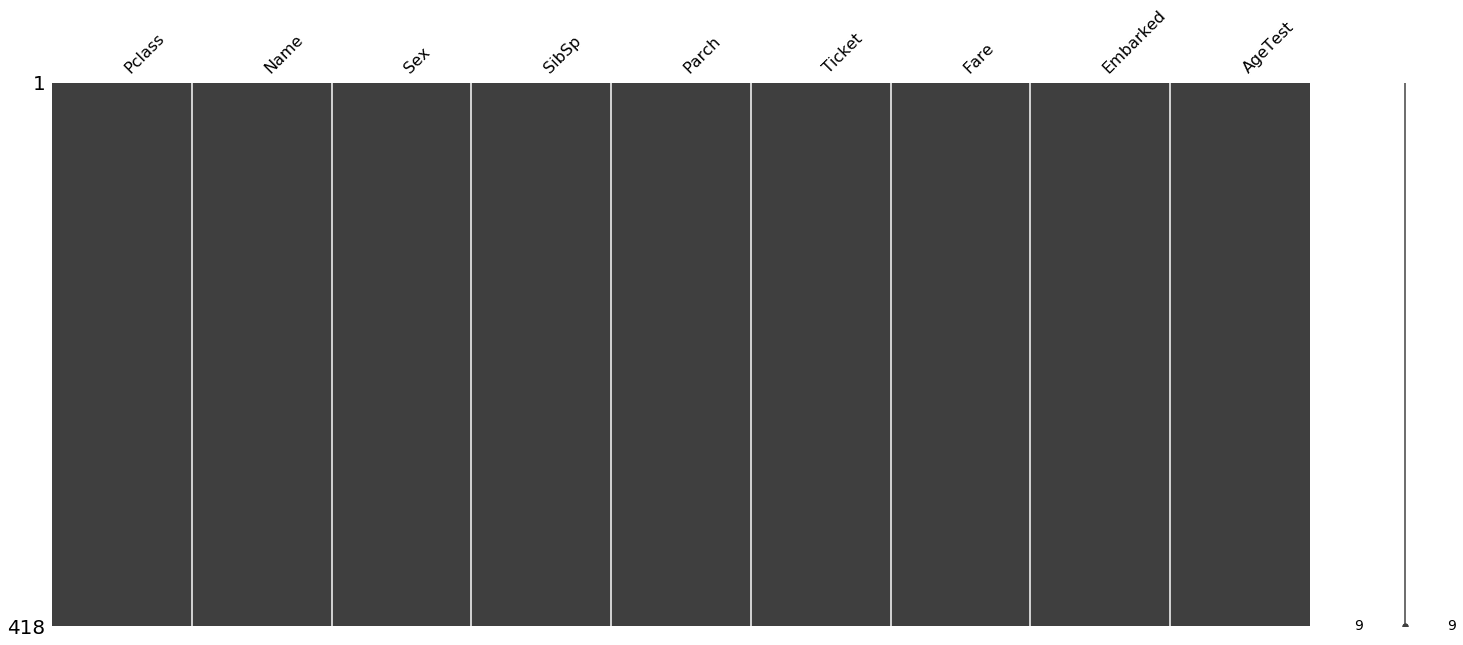

In [35]:
msno.matrix(test)

In [36]:
import sklearn.linear_model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import classification_report, confusion_matrix

In [37]:
train.head()

,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Embarked,AgeTrain,Family,FamilySize,AgeGroup,FarePP
PassengerId,,,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",1,1,0,A/5 21171,7.2500,S,22.0,2,Small,Young Adult,3.62500
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,1,0,PC 17599,71.2833,C,38.0,2,Small,Middle Age,35.64165
3,1,3,"Heikkinen, Miss. Laina",0,0,0,STON/O2. 3101282,7.9250,S,26.0,1,Alone,Adult,7.92500
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,1,0,113803,53.1000,S,35.0,2,Small,Adult,26.55000
5,0,3,"Allen, Mr. William Henry",1,0,0,373450,8.0500,S,35.0,1,Alone,Adult,8.05000


In [38]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 14 columns):
Survived      891 non-null int64
Pclass        891 non-null int64
Name          891 non-null object
Sex           891 non-null int64
SibSp         891 non-null int64
Parch         891 non-null int64
Ticket        891 non-null object
Fare          891 non-null float64
Embarked      891 non-null object
AgeTrain      891 non-null float64
Family        891 non-null int64
FamilySize    891 non-null object
AgeGroup      891 non-null object
FarePP        891 non-null float64
dtypes: float64(3), int64(6), object(5)
memory usage: 144.4+ KB


In [39]:
# Selecting Columns for X axis
# Selecting Survived for Y axis

x_train = np.array(train.iloc[:,[1,3,4,5,7,9,10,13]].values)
y_train = np.array(train.iloc[:,0].values)

In [40]:
x_train

array([[ 3.     ,  1.     ,  1.     , ..., 22.     ,  2.     ,  3.625  ],
       [ 1.     ,  0.     ,  1.     , ..., 38.     ,  2.     , 35.64165],
       [ 3.     ,  0.     ,  0.     , ..., 26.     ,  1.     ,  7.925  ],
       ...,
       [ 3.     ,  0.     ,  1.     , ..., 28.     ,  4.     ,  5.8625 ],
       [ 1.     ,  1.     ,  0.     , ..., 26.     ,  1.     , 30.     ],
       [ 3.     ,  1.     ,  0.     , ..., 32.     ,  1.     ,  7.75   ]])

In [41]:
test.head()

,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Embarked,AgeTest
PassengerId,,,,,,,,,
892,3,"Kelly, Mr. James",1,0,0,330911,7.8292,Q,34.5
893,3,"Wilkes, Mrs. James (Ellen Needs)",0,1,0,363272,7.0000,S,47.0
894,2,"Myles, Mr. Thomas Francis",1,0,0,240276,9.6875,Q,62.0
895,3,"Wirz, Mr. Albert",1,0,0,315154,8.6625,S,27.0
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,1,1,3101298,12.2875,S,22.0


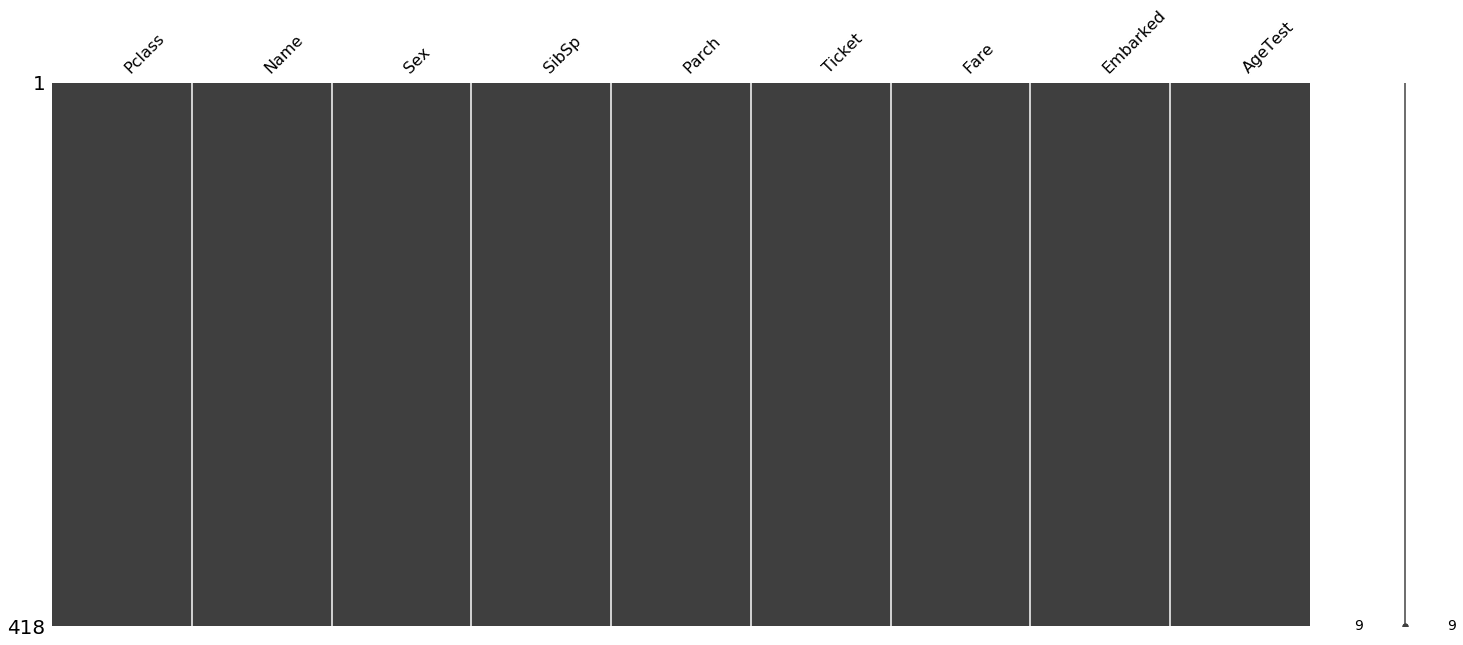

In [42]:
msno.matrix(test)

In [43]:
test.head()

,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Embarked,AgeTest
PassengerId,,,,,,,,,
892,3,"Kelly, Mr. James",1,0,0,330911,7.8292,Q,34.5
893,3,"Wilkes, Mrs. James (Ellen Needs)",0,1,0,363272,7.0000,S,47.0
894,2,"Myles, Mr. Thomas Francis",1,0,0,240276,9.6875,Q,62.0
895,3,"Wirz, Mr. Albert",1,0,0,315154,8.6625,S,27.0
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,1,1,3101298,12.2875,S,22.0


In [44]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 9 columns):
Pclass      418 non-null int64
Name        418 non-null object
Sex         418 non-null int64
SibSp       418 non-null int64
Parch       418 non-null int64
Ticket      418 non-null object
Fare        418 non-null float64
Embarked    418 non-null object
AgeTest     418 non-null float64
dtypes: float64(2), int64(4), object(3)
memory usage: 32.7+ KB


In [45]:
test.shape

(418, 9)

In [46]:
train.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
SibSp         0
Parch         0
Ticket        0
Fare          0
Embarked      0
AgeTrain      0
Family        0
FamilySize    0
AgeGroup      0
FarePP        0
dtype: int64

In [47]:
test.isnull().sum()

Pclass      0
Name        0
Sex         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Embarked    0
AgeTest     0
dtype: int64

In [48]:
# Selecting Columns on X axis
# Not sure what to select on Y axis
# Tried making a new Column Survived 
x_test = np.array(test.loc[:,['Pclass','Sex','SibSp','Parch','Fare','AgeTest']].values)
y_test = np.array(test.loc[:,].values)

In [49]:
x_test.shape

(418, 6)

In [50]:
# Linear Regression Training Model

model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [51]:
# tried multiple syntaxes to clear the shape error
# can't find solution
#x_test = np.arange(2508).reshape(418,6)
y_pred = model.predict(x_test)
accuracy = model.score(x_test,y_test)

ValueError: shapes (418,6) and (8,) not aligned: 6 (dim 1) != 8 (dim 0)

In [ ]:
plt.plot(x_train, model.predict(x_train), color='green')
plt.show()
print(accuracy)